평균온도와 평균습도 자료를 이용하여 로지스틱 회귀분석과 이진트리로 모델 평가하기</br>
some data on weather conditions in 2013 at Toulouse airport </br>
related URL : https://risk-engineering.org/notebook/data-analysis-weather.html </br>
You can download at https://risk-engineering.org/static/data/TLS-weather-data-2013.csv

In [1]:
import numpy as np
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
Weather_df= pd.read_csv("TLS-weather-data-2013.csv")

In [3]:
Weather_df.head()

,CET,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
0,2013-01-01,12,9,6,8,7,5,93,86,76,...,31,10,5,26,14,NaN,5.08,7.0,Rain,234
1,2013-01-02,9,7,4,6,4,2,93,86,71,...,31,11,10,23,16,NaN,0.00,5.0,NaN,298
2,2013-01-03,8,4,0,4,2,-1,100,87,69,...,19,10,10,13,5,NaN,0.00,5.0,NaN,118
3,2013-01-04,7,6,5,7,6,4,100,94,83,...,10,6,1,10,5,NaN,0.00,8.0,Fog,292
4,2013-01-05,7,6,5,6,6,4,100,94,90,...,11,9,2,16,8,NaN,0.00,8.0,NaN,306


In [4]:
Weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CET                         365 non-null    object 
 1   Max TemperatureC            365 non-null    int64  
 2   Mean TemperatureC           365 non-null    int64  
 3   Min TemperatureC            365 non-null    int64  
 4   Dew PointC                  365 non-null    int64  
 5   MeanDew PointC              365 non-null    int64  
 6   Min DewpointC               365 non-null    int64  
 7   Max Humidity                365 non-null    int64  
 8   Mean Humidity               365 non-null    int64  
 9   Min Humidity                365 non-null    int64  
 10  Max Sea Level PressurehPa   365 non-null    int64  
 11  Mean Sea Level PressurehPa  365 non-null    int64  
 12  Min Sea Level PressurehPa   365 non-null    int64  
 13  Max VisibilityKm            365 non

In [5]:
#Weather_df["CET"] = pd.to_datetime(Weather_df["CET"])

In [6]:
Weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CET                         365 non-null    object 
 1   Max TemperatureC            365 non-null    int64  
 2   Mean TemperatureC           365 non-null    int64  
 3   Min TemperatureC            365 non-null    int64  
 4   Dew PointC                  365 non-null    int64  
 5   MeanDew PointC              365 non-null    int64  
 6   Min DewpointC               365 non-null    int64  
 7   Max Humidity                365 non-null    int64  
 8   Mean Humidity               365 non-null    int64  
 9   Min Humidity                365 non-null    int64  
 10  Max Sea Level PressurehPa   365 non-null    int64  
 11  Mean Sea Level PressurehPa  365 non-null    int64  
 12  Min Sea Level PressurehPa   365 non-null    int64  
 13  Max VisibilityKm            365 non

In [7]:
#Weather_df=Weather_df.set_index(keys ="CET", inplace=False, drop = True)

In [8]:
Weather_df.head()

,CET,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
0,2013-01-01,12,9,6,8,7,5,93,86,76,...,31,10,5,26,14,NaN,5.08,7.0,Rain,234
1,2013-01-02,9,7,4,6,4,2,93,86,71,...,31,11,10,23,16,NaN,0.00,5.0,NaN,298
2,2013-01-03,8,4,0,4,2,-1,100,87,69,...,19,10,10,13,5,NaN,0.00,5.0,NaN,118
3,2013-01-04,7,6,5,7,6,4,100,94,83,...,10,6,1,10,5,NaN,0.00,8.0,Fog,292
4,2013-01-05,7,6,5,6,6,4,100,94,90,...,11,9,2,16,8,NaN,0.00,8.0,NaN,306


In [9]:
Weather_df.describe()

,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,Max Sea Level PressurehPa,...,Min Sea Level PressurehPa,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,WindDirDegrees
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,...,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,61.000000,365.000000,358.000000,365.000000
mean,17.769863,13.369863,9.038356,10.690411,8.473973,6.008219,91.994521,73.884932,49.701370,1019.895890,...,1014.224658,24.000000,9.975342,7.178082,25.945205,13.252055,56.229508,1.186356,5.315642,235.534247
std,8.242990,7.207495,6.569046,5.605143,5.657583,5.797161,6.700826,10.917167,16.428203,7.524328,...,8.707010,7.936216,1.387521,3.445584,9.329868,6.474975,15.584601,3.008979,2.271078,75.526300
min,-1.000000,-2.000000,-7.000000,-6.000000,-8.000000,-10.000000,63.000000,47.000000,14.000000,996.000000,...,979.000000,7.000000,2.000000,0.000000,8.000000,3.000000,27.000000,0.000000,1.000000,1.000000
25%,12.000000,7.000000,4.000000,6.000000,4.000000,2.000000,88.000000,67.000000,38.000000,1016.000000,...,1010.000000,19.000000,10.000000,5.000000,19.000000,8.000000,48.000000,0.000000,4.000000,156.000000
50%,18.000000,13.000000,9.000000,10.000000,8.000000,6.000000,93.000000,75.000000,48.000000,1020.000000,...,1015.000000,26.000000,10.000000,10.000000,26.000000,11.000000,52.000000,0.000000,6.000000,270.000000
75%,24.000000,19.000000,14.000000,15.000000,13.000000,11.000000,94.000000,82.000000,60.000000,1025.000000,...,1020.000000,31.000000,11.000000,10.000000,32.000000,18.000000,61.000000,0.760000,7.000000,294.000000
max,37.000000,28.000000,22.000000,22.000000,20.000000,17.000000,100.000000,96.000000,92.000000,1042.000000,...,1037.000000,31.000000,14.000000,10.000000,60.000000,50.000000,108.000000,32.000000,8.000000,354.000000


In [10]:
Weather_df['Mean TemperatureC'].describe()

count    365.000000
mean      13.369863
std        7.207495
min       -2.000000
25%        7.000000
50%       13.000000
75%       19.000000
max       28.000000
Name: Mean TemperatureC, dtype: float64

In [11]:
Weather_df['Mean Humidity'].describe()

count    365.000000
mean      73.884932
std       10.917167
min       47.000000
25%       67.000000
50%       75.000000
75%       82.000000
max       96.000000
Name: Mean Humidity, dtype: float64

In [12]:
Weather_df['Events'].describe()

count      204
unique       9
top       Rain
freq       136
Name: Events, dtype: object

In [13]:
Weather_df.isnull().sum()

CET                             0
Max TemperatureC                0
Mean TemperatureC               0
Min TemperatureC                0
Dew PointC                      0
MeanDew PointC                  0
Min DewpointC                   0
Max Humidity                    0
Mean Humidity                   0
Min Humidity                    0
Max Sea Level PressurehPa       0
Mean Sea Level PressurehPa      0
Min Sea Level PressurehPa       0
Max VisibilityKm                0
Mean VisibilityKm               0
Min VisibilitykM                0
Max Wind SpeedKm/h              0
Mean Wind SpeedKm/h             0
Max Gust SpeedKm/h            304
Precipitationmm                 0
CloudCover                      7
Events                        161
WindDirDegrees                  0
dtype: int64

In [14]:
Weather_df['Events'] = Weather_df['Events'].fillna('NoEvent').to_numpy()  
Weather_df['CloudCover'] = Weather_df['CloudCover'].fillna(0).to_numpy() 

In [15]:
Weather_df

,CET,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
0,2013-01-01,12,9,6,8,7,5,93,86,76,...,31,10,5,26,14,NaN,5.08,7.0,Rain,234
1,2013-01-02,9,7,4,6,4,2,93,86,71,...,31,11,10,23,16,NaN,0.00,5.0,NoEvent,298
2,2013-01-03,8,4,0,4,2,-1,100,87,69,...,19,10,10,13,5,NaN,0.00,5.0,NoEvent,118
3,2013-01-04,7,6,5,7,6,4,100,94,83,...,10,6,1,10,5,NaN,0.00,8.0,Fog,292
4,2013-01-05,7,6,5,6,6,4,100,94,90,...,11,9,2,16,8,NaN,0.00,8.0,NoEvent,306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2013-12-27,15,9,2,8,4,2,93,74,48,...,23,10,10,29,11,NaN,0.00,6.0,NoEvent,145
361,2013-12-28,11,8,5,10,6,3,100,81,51,...,31,11,8,35,23,55.0,7.87,7.0,Rain,214
362,2013-12-29,9,7,4,5,4,3,87,78,57,...,26,10,10,27,21,NaN,0.00,6.0,Rain,262
363,2013-12-30,9,4,0,4,2,0,100,83,51,...,23,8,0,16,6,NaN,0.00,7.0,Fog,135


In [16]:
data = Weather_df[['Mean TemperatureC','MeanDew PointC', 'Mean Humidity', 'Mean Sea Level PressurehPa',
                   'Mean VisibilityKm', 'Mean Wind SpeedKm/h', 'Precipitationmm', 'CloudCover']].to_numpy()
target = Weather_df['Events'].to_numpy()

In [17]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data, target, random_state = 42)

In [18]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input, train_target)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

K최근접 이웃

In [19]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)

print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8021978021978022
0.6739130434782609


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [20]:
print(kn.classes_)

['Fog' 'Fog-Rain' 'Fog-Rain-Snow' 'Fog-Rain-Thunderstorm' 'NoEvent' 'Rain'
 'Rain-Snow' 'Rain-Thunderstorm' 'Snow' 'Thunderstorm']


In [21]:
print(kn.predict(test_scaled[:5]))

['NoEvent' 'Rain' 'Rain' 'Rain' 'Fog']


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [22]:
import numpy as np

proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4))

[[0.     0.     0.     0.     0.6667 0.     0.     0.     0.     0.3333]
 [0.     0.     0.     0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.     0.     0.     0.    ]
 [1.     0.     0.     0.     0.     0.     0.     0.     0.     0.    ]]


In [23]:
distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])

[['Rain' 'Rain' 'Rain']]


In [24]:
print(train_input.shape, test_input.shape)

(273, 8) (92, 8)


In [25]:
print(train_target.shape, test_target.shape)

(273,) (92,)


In [26]:
# 로지스틱 2진 분류

In [27]:
rain_sunny_indexes = ((train_target == "Rain") | (train_target == "NoEvent" ))
np.sum(rain_sunny_indexes)

229

In [28]:
rain_sunny_indexes

array([ True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True, False,  True,  True,  True, False,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True, False,
        True, False,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
       False,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True, False, False,  True,
        True,  True,

In [29]:
train_Rain_Sunny = train_scaled[rain_sunny_indexes]
target_Rain_Sunny = train_target[rain_sunny_indexes]

In [30]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_Rain_Sunny, target_Rain_Sunny)

LogisticRegression()

In [31]:
print(lr.predict(train_Rain_Sunny[:5]))

['NoEvent' 'Rain' 'NoEvent' 'NoEvent' 'Rain']


In [32]:
print(lr.predict_proba(train_Rain_Sunny[:5]))

[[0.84798832 0.15201168]
 [0.47084431 0.52915569]
 [0.75071768 0.24928232]
 [0.9873268  0.0126732 ]
 [0.02935874 0.97064126]]


In [33]:
print(lr.classes_)

['NoEvent' 'Rain']


In [34]:
print(lr.coef_, lr.intercept_)

[[ 0.29711925 -0.36773468  0.93913272 -0.61942594 -0.25616237  0.01699261
   2.74823228  1.1768347 ]] [0.19490934]


In [35]:
decisions = lr.decision_function(train_Rain_Sunny[:5])
print(decisions)

[-1.71890947  0.11675522 -1.1024436  -4.35551187  3.49836662]


In [36]:
from scipy.special import expit

print(expit(decisions))

[0.15201168 0.52915569 0.24928232 0.0126732  0.97064126]


#로지스틱 회귀#

In [37]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_input, train_target)
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.7326007326007326
0.6521739130434783


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [38]:
print(lr.predict(train_input[:5]))

['NoEvent' 'Rain' 'NoEvent' 'NoEvent' 'Rain']


In [39]:
print(lr.predict_proba(train_input[:5]))

[[3.10513218e-04 7.70083882e-04 4.57814535e-04 1.03121057e-03
  8.60117822e-01 1.02565891e-01 2.26426980e-04 7.91260233e-03
  1.40088545e-03 2.52067507e-02]
 [2.91947960e-04 4.32660352e-03 2.42678209e-03 3.28306514e-03
  4.10413607e-01 5.17900102e-01 1.77653886e-03 4.36813874e-02
  3.47439460e-03 1.24255714e-02]
 [8.95911171e-04 1.32217351e-03 9.81590561e-04 1.24371147e-03
  6.99924032e-01 2.79811167e-01 7.77161890e-04 2.77583665e-03
  4.22637757e-03 8.04203767e-03]
 [1.46976071e-04 3.83504217e-04 1.70226783e-04 5.81004937e-04
  9.37420490e-01 1.87529963e-02 6.22114440e-05 8.43488937e-03
  3.51495253e-04 3.36962054e-02]
 [2.19220663e-02 3.39160433e-02 1.00958563e-02 7.08245698e-03
  9.93118634e-02 7.90281953e-01 1.97721892e-02 7.56356475e-03
  8.72464450e-03 1.32936197e-03]]


In [40]:
print(lr.classes_)

['Fog' 'Fog-Rain' 'Fog-Rain-Snow' 'Fog-Rain-Thunderstorm' 'NoEvent' 'Rain'
 'Rain-Snow' 'Rain-Thunderstorm' 'Snow' 'Thunderstorm']


In [41]:
print(lr.coef_, lr.intercept_)

[[-1.10584315e-01 -1.00719501e-01  1.31086480e-01 -3.74954423e-03
  -1.09455438e-01 -2.68742445e-01 -6.34140548e-02 -4.90536749e-02]
 [ 3.67843810e-03  1.97593327e-02  1.12317030e-01 -7.91041457e-03
  -2.42047363e-02 -6.61590973e-02 -8.68312467e-03  1.14599372e-02]
 [-3.64582340e-02 -2.14142384e-02  3.59065379e-02 -3.46693598e-03
  -6.42591876e-03  2.18025985e-02  1.73983513e-02  5.31018718e-03]
 [ 2.61208718e-02  3.09461094e-02  2.46667982e-02 -3.56024748e-03
   5.76106886e-05 -7.71313280e-03  3.84458218e-02  5.04182623e-03]
 [-2.74680428e-02 -8.42323825e-03 -1.40513980e-01  1.42126764e-02
   7.65896494e-02  4.69611090e-02 -2.25213820e-01 -1.89007414e-01]
 [-2.32243824e-02 -4.09892963e-02 -2.99439252e-02  3.73292845e-03
   7.68688443e-02  6.88265142e-02 -5.07671202e-03  1.81759562e-01]
 [-8.08188192e-02 -6.23814627e-02  7.61155296e-02 -5.13463547e-03
  -1.31899626e-02  3.61121525e-03 -3.75790459e-04  1.34939617e-02]
 [ 2.00567089e-01  1.86827276e-01 -3.15786634e-02 -4.40461037e-03
   

In [42]:
decisions = lr.decision_function(train_input[:5])
decisions

array([[-2.50488609, -1.59661311, -2.1166484 , -1.30462385,  5.4217121 ,
         3.29514815, -2.82069005,  0.73309944, -0.99825277,  1.89175457],
       [-3.50044576, -0.80448322, -1.38269991, -1.08048857,  3.7478994 ,
         3.98051632, -1.69459904,  1.50765605, -1.0238458 ,  0.25049051],
       [-1.79479822, -1.40560723, -1.70346521, -1.46678419,  4.86608759,
         3.94923076, -1.93699081, -0.66393201, -0.24353895,  0.39979828],
       [-2.55868169, -1.59960087, -2.41181992, -1.18419223,  6.20193574,
         2.29015734, -3.41841251,  1.4911804 , -1.68675528,  2.87618903],
       [ 0.12646848,  0.56286291, -0.64890018, -1.00340437,  1.63723979,
         3.71136454,  0.02325112, -0.93768264, -0.79487352, -2.67632614]])

softmax 함수 적용

In [43]:
from scipy.special import softmax

proba = softmax(decisions, axis=1)
print(np.round(proba, decimals=3))

[[0.    0.001 0.    0.001 0.86  0.103 0.    0.008 0.001 0.025]
 [0.    0.004 0.002 0.003 0.41  0.518 0.002 0.044 0.003 0.012]
 [0.001 0.001 0.001 0.001 0.7   0.28  0.001 0.003 0.004 0.008]
 [0.    0.    0.    0.001 0.937 0.019 0.    0.008 0.    0.034]
 [0.022 0.034 0.01  0.007 0.099 0.79  0.02  0.008 0.009 0.001]]


sigmod 함수 적용 -적합하지 않은 결과 ?

In [44]:
from scipy.special import expit

proba = expit(decisions)
print(np.round(proba, decimals = 3))

[[0.076 0.168 0.107 0.213 0.996 0.964 0.056 0.675 0.269 0.869]
 [0.029 0.309 0.201 0.253 0.977 0.982 0.155 0.819 0.264 0.562]
 [0.142 0.197 0.154 0.187 0.992 0.981 0.126 0.34  0.439 0.599]
 [0.072 0.168 0.082 0.234 0.998 0.908 0.032 0.816 0.156 0.947]
 [0.532 0.637 0.343 0.268 0.837 0.976 0.506 0.281 0.311 0.064]]


#결정 트리#

In [45]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

1.0
0.6521739130434783


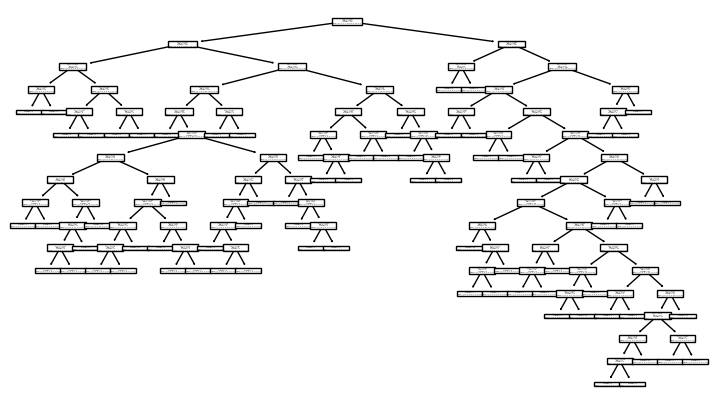

In [46]:
from sklearn.tree import plot_tree
plt.figure(figsize = (9,5))
plot_tree(dt)
plt.show()

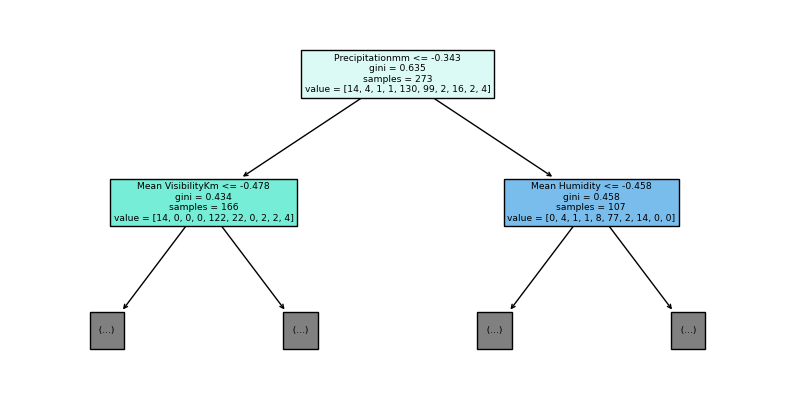

In [47]:
plt.figure(figsize=(10,5))
plot_tree(dt, max_depth = 1, filled = True, feature_names = ['Mean TemperatureC','MeanDew PointC', 'Mean Humidity', 'Mean Sea Level PressurehPa',
                   'Mean VisibilityKm', 'Mean Wind SpeedKm/h', 'Precipitationmm', 'CloudCover'])
plt.show()

In [48]:
dt = DecisionTreeClassifier(max_depth = 8, random_state = 42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.9267399267399268
0.7065217391304348


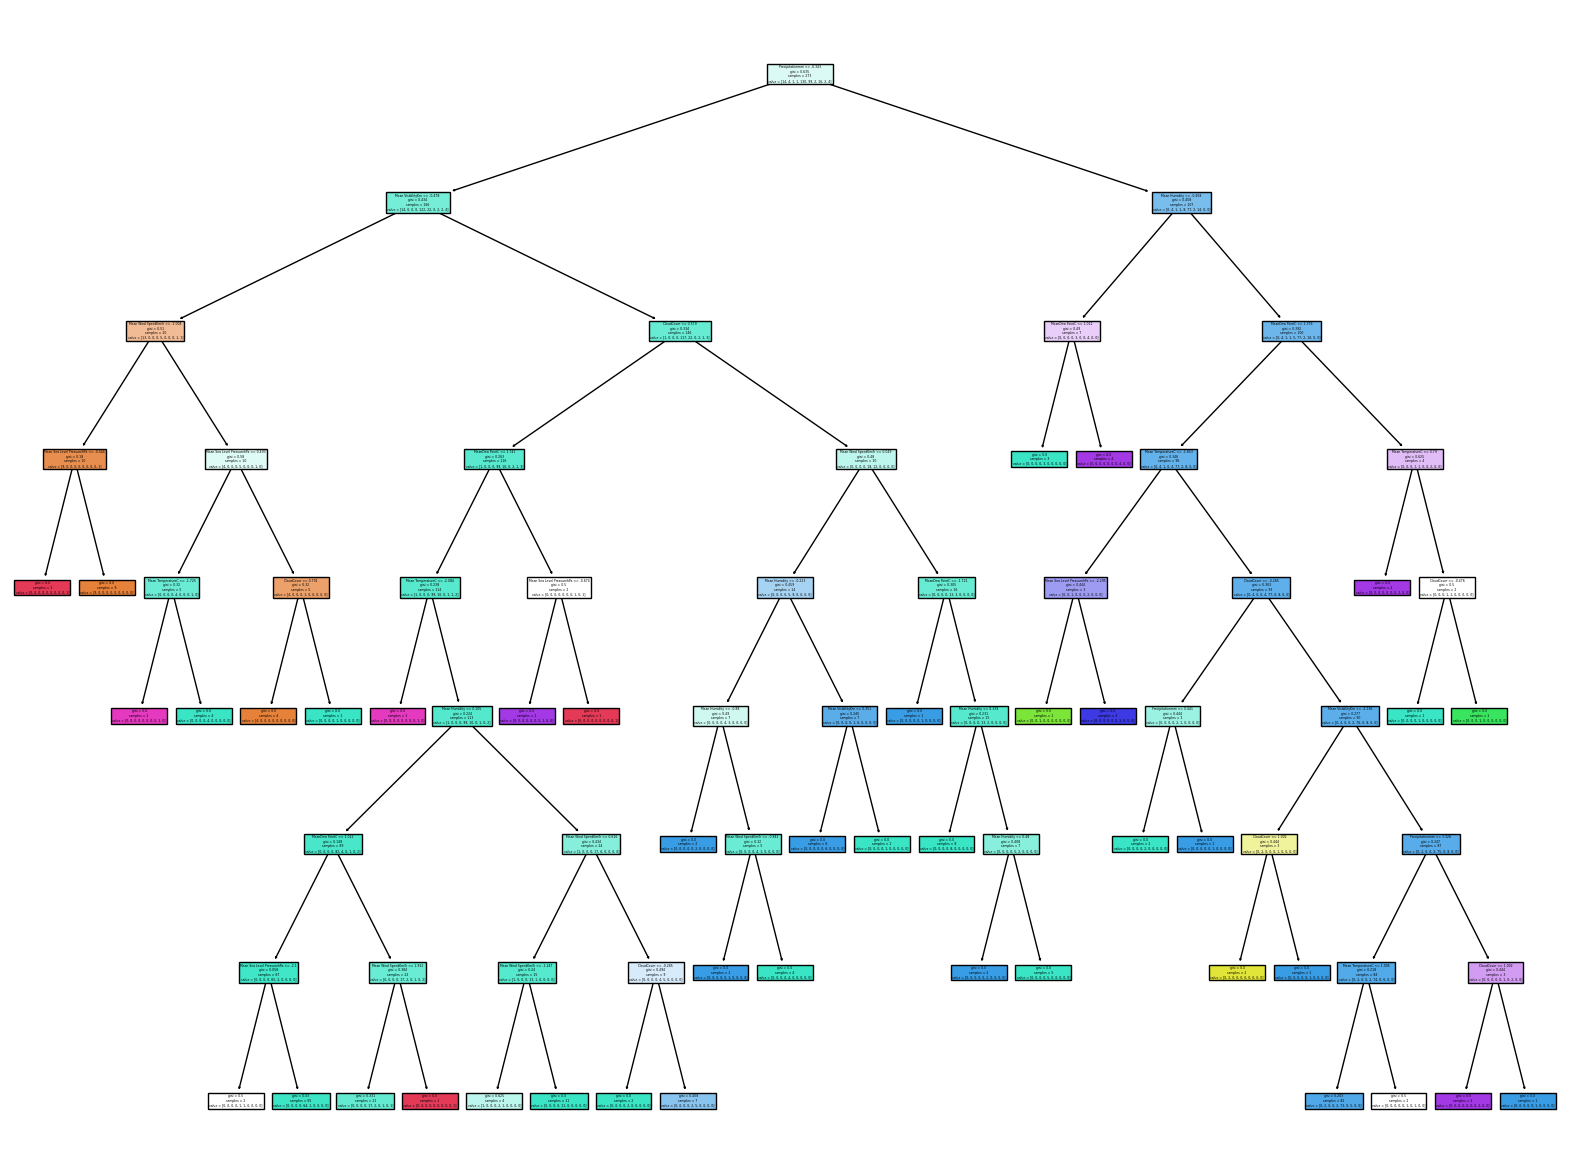

In [49]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled = True, feature_names = (['Mean TemperatureC','MeanDew PointC', 'Mean Humidity', 'Mean Sea Level PressurehPa',
                   'Mean VisibilityKm', 'Mean Wind SpeedKm/h', 'Precipitationmm', 'CloudCover']))
plt.show()